In [3]:
import os
import pathlib as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import get_data_home

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(1)

# Clustering End of Module Assignment 

In this notebook you will apply both k-means and hierarchical clustering. For the k-means task, you will be clustering amazon food reviews.


- [Part 1](#part1)- K-means clustering for amazon food reviews
- [Part 2](#part2)- Hierarchical clustering


[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - K-means clustering for Amazon Food Reviews

In this part of the assignment you will be clustering reviews of food from amazon. The data span a period of more than 10 years, up to October 2012. This task will consist of loading the data, vectorizing the text input and then fitting k-means model to the data to gain insights. 

First of all, load the "Reviews.csv" dataset.

In [45]:
df = pd.read_csv('Reviews.csv')

Remove any rows of the dataframe that include NaNs using `.dropna()`. As the dataset is large, we will work with a subset of it so use `.sample()` take a sample of 10000 rows. 

In [46]:
df = df.dropna()
df = df.sample(10000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
360042,360043,B003Y3F5R8,A2KIVODZRTGY4U,"Gwendolyn Dawson ""Literary License""",0,1,5,1311292800,A well-balanced meal for baby,We feed our baby this Wholesome Breakfast at a...
468634,468635,B007JXXET0,A1TN764XEGK4TU,Dubs,0,1,3,1340150400,Quantity Not as Advertised,The salsa itself is very tasty and if you are ...
79183,79184,B002WDCIXK,A3KHF4HNHSQYZ0,sambakervb,1,1,1,1330300800,TASSIMO HAS BLOWN IT...,THIS IS SO SIMILAR TO THE LATTE CREAMER I BELI...
182399,182400,B008RWUKXK,AWKOLLCRFFZAM,"J. Salzenstein ""Style Editor""",0,0,4,1320796800,Delicious and filling (just bring a toothbrush),I'm big on granola in the fall and winter; for...
220793,220794,B0059YB39O,A22GTSCZUAVGQC,paul liu,0,1,1,1290556800,"too dry and too salty, felt like chewing bark",I bought Oberto herky from Amazon few times a ...
...,...,...,...,...,...,...,...,...,...,...
451606,451607,B003GQ0W2Q,A1RRIREIPB1YLG,Maryann Watkins,2,2,5,1294185600,Excellent!,This is much better than the Roland brand Mack...
397976,397977,B000V17MLS,A2Z8MFNKRP7S8I,Teri Pigman,0,0,5,1306454400,As good as restaurants,This makes some of the best curry I've ever ea...
393274,393275,B001DKA7HM,A2X7HZFBBZNELO,Margaret Davis,1,1,5,1319414400,Great Gift,This was beautifully put together and made a p...
177182,177183,B0030VJ8E0,ADYLI7FA16B8H,"A. Rhodes ""~ Rhodes""",0,0,5,1291939200,Organic Fast Food? Yep!,"We love this stuff, and so does our son. Righ..."


Next, use `.head` to visualise the dataframe. 

In [47]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
360042,360043,B003Y3F5R8,A2KIVODZRTGY4U,"Gwendolyn Dawson ""Literary License""",0,1,5,1311292800,A well-balanced meal for baby,We feed our baby this Wholesome Breakfast at a...
468634,468635,B007JXXET0,A1TN764XEGK4TU,Dubs,0,1,3,1340150400,Quantity Not as Advertised,The salsa itself is very tasty and if you are ...
79183,79184,B002WDCIXK,A3KHF4HNHSQYZ0,sambakervb,1,1,1,1330300800,TASSIMO HAS BLOWN IT...,THIS IS SO SIMILAR TO THE LATTE CREAMER I BELI...
182399,182400,B008RWUKXK,AWKOLLCRFFZAM,"J. Salzenstein ""Style Editor""",0,0,4,1320796800,Delicious and filling (just bring a toothbrush),I'm big on granola in the fall and winter; for...
220793,220794,B0059YB39O,A22GTSCZUAVGQC,paul liu,0,1,1,1290556800,"too dry and too salty, felt like chewing bark",I bought Oberto herky from Amazon few times a ...


 Next we want to create a variable `texts` which is only the `'Text'` Column of the dataset.

In [48]:
texts = df['Text']
texts

360042    We feed our baby this Wholesome Breakfast at a...
468634    The salsa itself is very tasty and if you are ...
79183     THIS IS SO SIMILAR TO THE LATTE CREAMER I BELI...
182399    I'm big on granola in the fall and winter; for...
220793    I bought Oberto herky from Amazon few times a ...
                                ...                        
451606    This is much better than the Roland brand Mack...
397976    This makes some of the best curry I've ever ea...
393274    This was beautifully put together and made a p...
177182    We love this stuff, and so does our son.  Righ...
296307    This V8 Splash is good.  It's sweet and fruity...
Name: Text, Length: 10000, dtype: object

We will use the `TfidfVectorizer` to turn the strings into a vectorized format. 

This method allows us to convert the text into a vectorized format that the computer can understand. This particular method also weights for word frequency, so we don't put too much emphasis on common words such as "the", "a" and "and". 

You can read more about this method in the sci-kit learn documentation.

In [49]:
vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(texts) # convert our texts into vectors


Below, use the elbow curve method with cluster up to 15 to decide how many clusters you will use. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


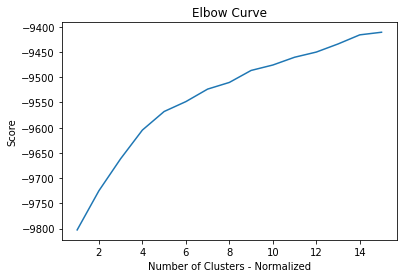

In [50]:
inertias= []
x_axis = range(1,16)
for k in x_axis:
    km = KMeans(n_clusters=k)
    inertias.append(km)
    
score=[]
for i in range(len(inertias)):
    score.append(inertias[i].fit(X).score(X))

plt.plot(x_axis,score)
plt.xlabel('Number of Clusters - Normalized')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show() 


How many clusters did you decide to use and Why?

5 based on the elbow curve above. The score doesn't seem to increase much beyond 5.

Now fit a Kmeans model for your chosen number of clusters 

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

We will now make a wordcloud of the most common words in each cluster. For this part you will need to install the wordcloud package on your computer. To do this go to your command line and enter the command `pip install wordcloud`.

In [52]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


The two functions below will allow you to plot the wordclouds easily 

In [53]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

Use the code cell below to create wordclouds for each cluster. What are the significant clusters you see? 

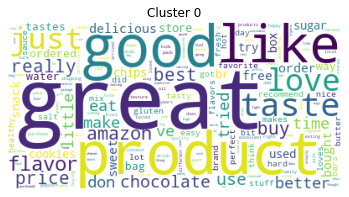

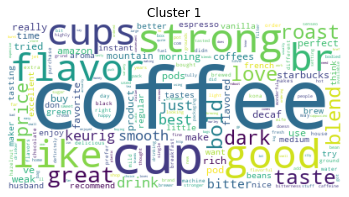

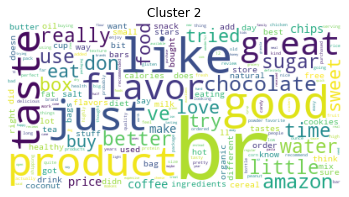

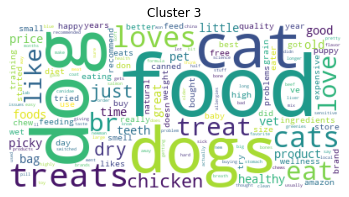

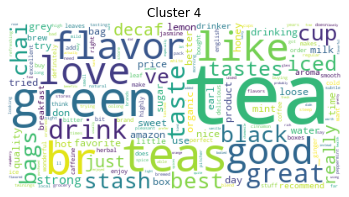

In [54]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)



What do you notice about the cluster? What would you say the main clusters are?
Clusters are about food preferences, tea, coffee, chocolate

Give an example of how this type of clustering could be useful in your industry

In computer vision (CV), clustering is a technique used for various tasks such as image segmentation, feature extraction, and object recognition. Clustering algorithms group similar data points together based on certain similarity measures. 

[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - Hierarchical Clustering

In this part of the assignment you will be clustering Airbnb data from new york. This dataset includes the following factors:

- price - price in dollars
- minimum_nights - the minimum number of nights a guest can stay
- number_of_reviews - the number of reviews the listing has
- reviews_per_month - the number of reviews it has got per month
- calculated_host_listings_count - the number of listings the host has
- availability_365 - how many days a year it is available 

First of all load the `AB_NYC.csv` dataset and use `.head()` to see what it looks like. 

In [15]:
df2 = pd.read_csv('AB_NYC.csv')
df2.head()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,140,2,37,2.64,1,157
1,90,3,8,0.32,1,0
2,225,2,3,0.09,1,88
3,47,1,18,0.80,1,0
4,155,20,25,1.06,2,62


Next use `normalize` to normalize the data. You'll need to pass the argument `axis=1` to the normalize function so it normalizes each column seperately. 

In [24]:
from sklearn.preprocessing import normalize


data_scaled = normalize(df2, axis=1)
data_scaled = pd.DataFrame(data_scaled, columns=df2.columns)


Next make a dendrogram from the data. 

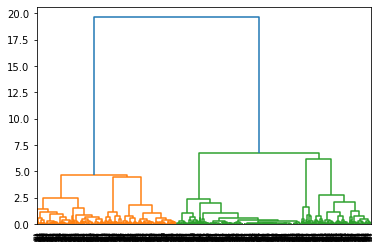

In [25]:
import matplotlib as mpl
import scipy.cluster.hierarchy as shc

dendrogram = shc.dendrogram(Z =shc.linkage(data_scaled, method='ward'))


How many clusters would you choose and why? 

2 as it is the longest part of the dendrogram

Now use `AgglomerativeClustering` to create your selected number of clusters. What distance metric would you use and why?


euclidean distance

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
_ = cluster.fit_predict(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Use the cell below to visualise the clusters 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


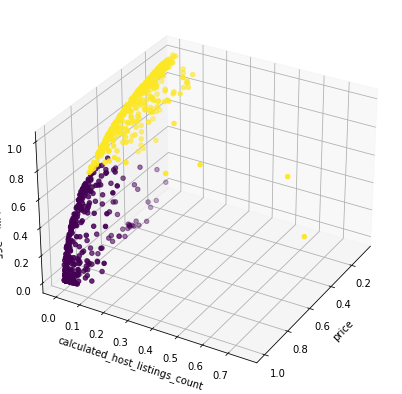

Text(0.5, 0, 'availability_365')

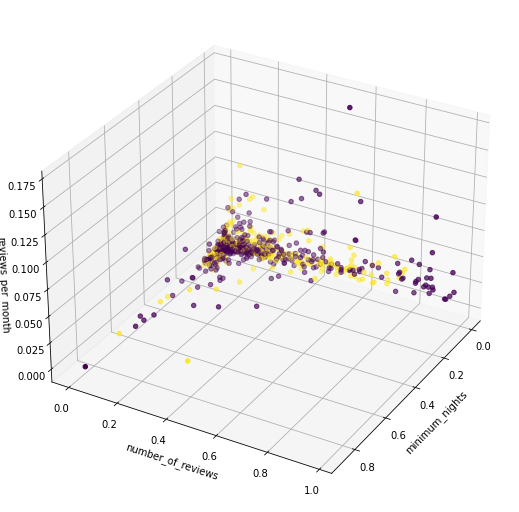

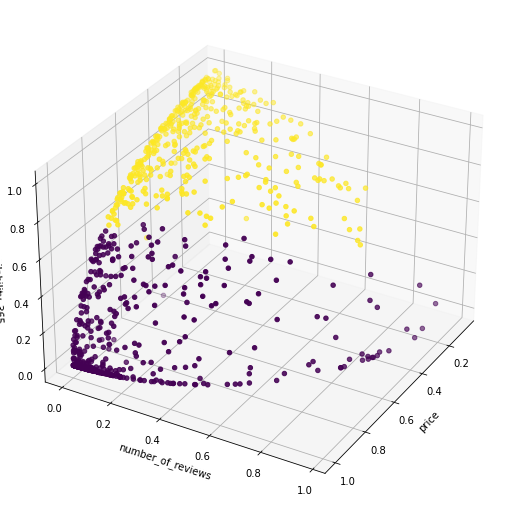

In [27]:
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')
ax.scatter3D(data_scaled['price'],data_scaled['calculated_host_listings_count'
             ],data_scaled['availability_365'], c=cluster.labels_)
ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('calculated_host_listings_count')
ax.set_zlabel('availability_365')
plt.show()

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['minimum_nights'], data_scaled['number_of_reviews'
             ],data_scaled['reviews_per_month'], c=cluster.labels_)
ax.view_init(30,30)
ax.set_xlabel('minimum_nights')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('reviews_per_month')

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['price'], data_scaled['number_of_reviews'
             ],data_scaled['availability_365'], c=cluster.labels_)

ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('availability_365')

add a new column to your data dataframe called `cluster` for the cluster labels. Then use the pandas `groupby()` function to calculate the mean of each cluster. 

In [30]:
df2['cluster'] = cluster.labels_
print(df2.groupby('cluster').mean())

              price  minimum_nights  number_of_reviews  reviews_per_month  \
cluster                                                                     
0        164.714777        4.896907          22.209622           1.137955   
1        114.019139        8.564593          38.799043           1.784641   

         calculated_host_listings_count  availability_365  
cluster                                                    
0                              1.589347         30.460481  
1                              6.763158        247.622010  


How would you describe the different clusters? What is different about them?

cluster0-: higher price, low listing counts, less availability

seems to be opposite for cluster 1

**your answer here** 

Congrats you've finished the Module 15 Assignment!